Time Series Model Selection (AIC & BIC) : Time Series Talk
https://www.youtube.com/watch?v=McEN54l3EPU&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3&index=35

Cleaning Time Series Data : Time Series Talk
https://www.youtube.com/watch?v=7_Js8h709Dw&list=PLvcbYUQ5t0UHOLnBzl46_Q6QKtFgfMGc3&index=33

Full Time Series Example : Time Series Talk
https://www.youtube.com/watch?v=tjfqfDAqtR4

In [3]:
# Importacao das libraries
import pandas as pd
import functions as main
import numpy as np
from scipy import stats
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

# Load Data

In [4]:
opencsv = pd.read_csv("https://raw.githubusercontent.com/notp1ssed/ProjetoFinal-PosGraduacaoEngenhariaFinanceira/main/full_clean_df.csv", sep=",")
opencsv.set_index('Date', inplace=True)
opencsv.index = pd.to_datetime(opencsv.index)
opencsv = opencsv.astype(float)

In [10]:
opencsv

,BTC_USD,Mining_Difficulty,M2_Liquidity,EUR_USD,JPY_USD,JPY_EUR,SPY,QQQ,EXSA,JPXN,...,GLD,SLV,TLT,BND,BTC_Supply,USD_OnChain_Volume,Nr_Transactions,Nr_Addresses,BTC_PageViews,Crypto_PageViews
Date,,,,,,,,,,,,,,,,,,,,,
2010-07-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,0.000000e+00,325.000,374.0,0.0,0.0
2010-08-06,0.002311,4.608947e-03,NaN,0.040906,-0.001580,0.000717,0.004287,0.005552,0.004752,0.005701,...,0.004242,0.009590,-0.000132,0.001256,0.000336,0.000000e+00,3018.000,3495.0,0.0,0.0
2010-08-13,-0.012502,0.000000e+00,0.000523,-0.097831,0.000630,-0.005199,-0.007614,-0.011228,-0.004201,-0.010480,...,0.001595,-0.006368,0.005114,0.000637,0.000336,0.000000e+00,2748.000,3131.0,0.0,0.0
2010-08-20,-0.005613,4.608947e-03,0.000070,-0.006842,-0.001912,-0.002101,-0.001633,0.001215,-0.005482,0.002372,...,0.002157,-0.002953,0.008465,0.000665,0.000336,0.000000e+00,2645.000,2886.0,0.0,0.0
2010-08-27,0.002811,4.608947e-03,-0.000664,-0.032165,-0.002645,-0.004150,-0.001415,-0.005195,-0.000542,-0.002087,...,0.001803,0.021341,-0.001522,-0.000241,0.000336,0.000000e+00,2483.000,2698.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-07-05,-0.005715,-1.368981e-03,0.000202,0.115282,0.001141,0.002626,0.003011,0.005666,0.002687,0.005649,...,0.005057,0.021166,0.002579,0.001854,0.000009,3.829871e+10,3994401.000,3633064.0,28930.0,193.0
2024-07-12,0.002022,-2.299141e-04,0.000000,0.096068,-0.004206,-0.002819,0.001519,-0.000436,0.003676,0.004810,...,0.001819,-0.003798,0.003271,0.001865,0.000010,3.829871e+10,4511007.000,3347222.0,31939.0,202.0
2024-07-19,0.012892,9.874349e-04,0.000000,0.031618,-0.001316,-0.000767,-0.003135,-0.006508,-0.007030,-0.003325,...,-0.001147,-0.015643,-0.002405,-0.000832,0.000010,3.829871e+10,3973575.000,3302251.0,29240.0,256.0


In [5]:
full_sample = opencsv.loc["2010-08-13":"2024-07-26"]
full_sample.isnull().sum()

BTC_USD               0
Mining_Difficulty     0
M2_Liquidity          0
EUR_USD               0
JPY_USD               0
JPY_EUR               0
SPY                   0
QQQ                   0
EXSA                  0
JPXN                  0
IWDA                  0
GLD                   0
SLV                   0
TLT                   0
BND                   0
BTC_Supply            0
USD_OnChain_Volume    0
Nr_Transactions       0
Nr_Addresses          0
BTC_PageViews         0
Crypto_PageViews      0
dtype: int64

## Matriz de Correlacoes


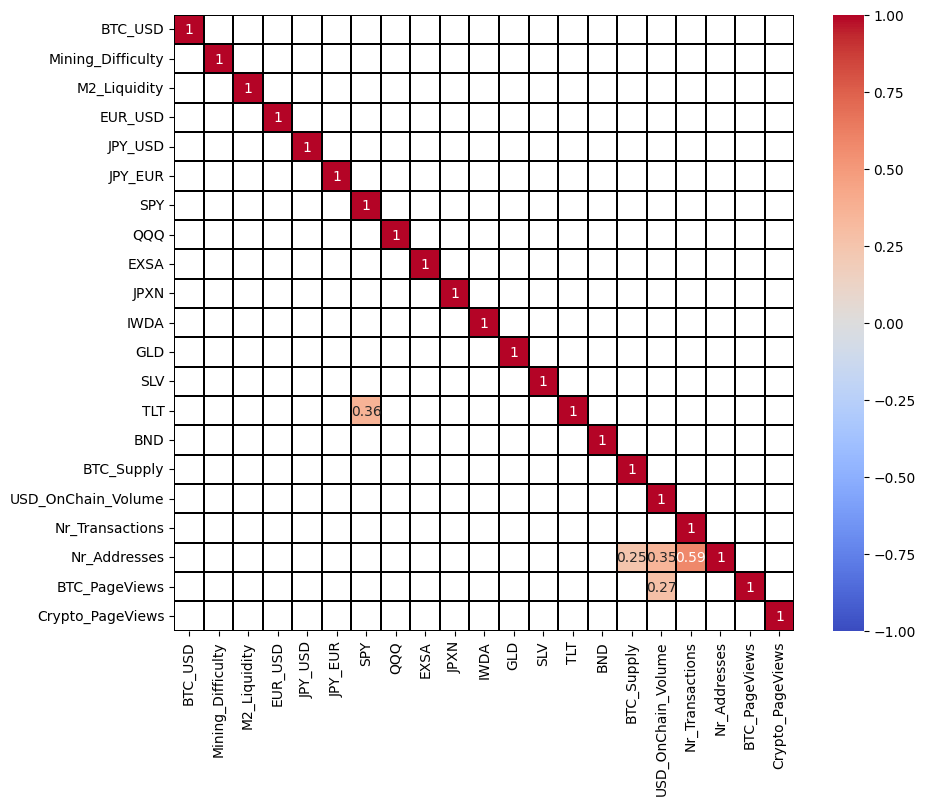

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

def correlation_map(df, threshold=None):
    quotes_pct_ret_corr = df.pct_change().dropna().corr()

    # Getting the Upper Triangle of the co-relation matrix
    matrix = np.triu(quotes_pct_ret_corr)
    np.fill_diagonal(matrix, False)

    if threshold is not None:
        # Apply the threshold: keep only correlations above the threshold
        quotes_pct_ret_corr = quotes_pct_ret_corr.applymap(lambda x: x if abs(x) >= threshold else np.nan)

    plt.subplots(figsize=(10, 8))
    sns.heatmap(quotes_pct_ret_corr, annot=True, vmin=-1, vmax=1, cmap='coolwarm', mask=matrix, linewidths=0.003, linecolor='black')
    plt.show()

correlation_map(full_sample, threshold=0.2)

## Causality Test

https://phdinds-aim.github.io/time_series_handbook/04_GrangerCausality/04_GrangerCausality.html

## Teste de Multicolinearidade


Como você tem muitas variáveis, é importante verificar a multicolinearidade, especialmente porque as variáveis acumuladas podem estar altamente correlacionadas entre si. Testes como o VIF (Variance Inflation Factor) podem ajudar a identificar problemas.

Multicollinearity describes the state where the independent variables used in a study exhibit a strong relationship with each other. This can pose a problem in many cases as you would normally want your independent variables to be… independent.

In [6]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# the full independent variables set
X = full_sample.drop(["BTC_USD"], axis = 1)

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i)
                          for i in range(len(X.columns))]

print(vif_data)

               feature        VIF
0    Mining_Difficulty   1.394733
1         M2_Liquidity   1.111243
2              EUR_USD   2.900409
3              JPY_USD   4.979418
4              JPY_EUR   5.239031
5                  SPY  10.633863
6                  QQQ   6.858458
7                 EXSA   6.106738
8                 JPXN   2.238868
9                 IWDA   8.608690
10                 GLD   3.481245
11                 SLV   3.295711
12                 TLT   5.746050
13                 BND   5.891920
14          BTC_Supply   1.432864
15  USD_OnChain_Volume   4.246613
16     Nr_Transactions  14.592367
17        Nr_Addresses  21.629005
18       BTC_PageViews   8.377673
19    Crypto_PageViews   6.547386


**Interpreting the VIF Values:**

VIF < 5: Generally considered acceptable, indicating low to moderate multicollinearity.

VIF between 5 and 10: Indicates moderate to high multicollinearity, which may be problematic, but not necessarily requiring immediate removal.

VIF > 10: Strong multicollinearity, typically suggesting that the variable should be considered for removal or that further investigation is needed.

## Seleção de Variáveis

Considerar técnicas como regressão lasso, ridge ou elastic net, que fazem seleção de variáveis automaticamente, pode ser útil se você suspeitar que nem todas as 20 variáveis são relevantes.

In [23]:
full_sample.columns

Index(['BTC_USD', 'Mining_Difficulty', 'M2_Liquidity', 'EUR_USD', 'JPY_USD',
       'JPY_EUR', 'SPY', 'QQQ', 'EXSA', 'JPXN', 'IWDA', 'GLD', 'SLV', 'TLT',
       'BND', 'BTC_Supply', 'USD_OnChain_Volume', 'Nr_Transactions',
       'Nr_Addresses', 'BTC_PageViews', 'Crypto_PageViews'],
      dtype='object')

In [27]:
model1_list = ["Mining_Difficulty", "M2_Liquidity", "GLD", "BTC_Supply", "USD_OnChain_Volume", "BTC_PageViews"]

model1_df = pd.DataFrame()
model1_df = full_sample[model1_list]
model1_df

,Mining_Difficulty,M2_Liquidity,GLD,BTC_Supply,USD_OnChain_Volume,BTC_PageViews
Date,,,,,,
2010-08-13,0.000000e+00,0.000523,0.001595,0.000336,0.000000e+00,0.0
2010-08-20,4.608947e-03,0.000070,0.002157,0.000336,0.000000e+00,0.0
2010-08-27,4.608947e-03,-0.000664,0.001803,0.000336,0.000000e+00,0.0
2010-09-03,0.000000e+00,0.000080,0.001460,0.000336,8.831841e+03,0.0
2010-09-10,4.608947e-03,0.001076,-0.000222,0.000336,8.242776e+03,0.0
...,...,...,...,...,...,...
2024-06-28,0.000000e+00,-0.000440,0.000199,0.000009,3.829871e+10,30430.0
2024-07-05,-1.368981e-03,0.000202,0.005057,0.000009,3.829871e+10,28930.0
2024-07-12,-2.299141e-04,0.000000,0.001819,0.000010,3.829871e+10,31939.0


we also construct
variables capturing the number of new members
(new members) and new posts on online BitCoin
forums (new posts) extracted from bitcointalk.org.

The size of the BitCoin economy (number of transactions and number of addresses) has
always a positive and statistically significant impact
on BitCoin price

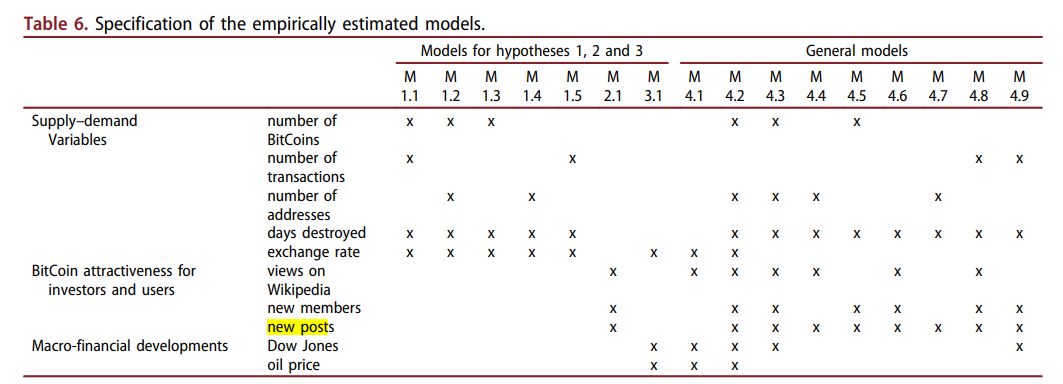

## Modelos de estudos anteriores

**Modelos pre covid**

**Modelos pos covid**

**Modelo geral**
Ciain
Supply + Nr addresses / Nr Transactions + Oil + Dow Jones + EUR-USD
Supply + Nr addresses / Nr Transactions + New Posts
Supply + New Posts
Nr addresses / Nr Transactions + New Posts


https://github.com/jack-tobin/mvgarch

## Regressao Linear Multipla

In [28]:
# Yt = b0 + b1X1t + b2X2t + εt

X = model1_df
y = full_sample["BTC_USD"]

X = sm.add_constant(X) # Add a constant term to the predictors

fit = sm.OLS(y, X).fit() # Fit the OLS model

print(fit.summary()) # Print the summary of the regression results

                            OLS Regression Results                            
Dep. Variable:                BTC_USD   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                 -0.003
Method:                 Least Squares   F-statistic:                    0.6178
Date:                Sat, 17 Aug 2024   Prob (F-statistic):              0.716
Time:                        19:38:26   Log-Likelihood:                 2006.7
No. Observations:                 729   AIC:                            -3999.
Df Residuals:                     722   BIC:                            -3967.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  0.0024      0

## Heterocedasticidade 

Avalie se há heterocedasticidade nos resíduos da regressão, especialmente após as transformações, e considere correções se necessário (por exemplo, usando robust standard errors).